# Exploratory Data Analysis (EDA)

### 1. Import necessary libraries:

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

### 2. Load data as a Pandas DataFrame:

In [2]:
path_irrad = "../data/G07A_DATOS_IRRAD.csv"
df_orig_irrad = pd.read_csv(path_irrad)

# Parse the date (string) for it to be a datetime with format yyyy/mm/dd
df_orig_irrad['FECHA'] = pd.to_datetime(df_orig_irrad['FECHA'], format='%Y-%m-%d')

s = df_orig_irrad.loc[:,'FECHA']
df_orig_irrad['FECHA'] =  s.dt.date

In [3]:
path_util = "../data/G07A_DATOS_UTIL.csv"
df_orig_util = pd.read_csv(path_util)

# Parse the date (string) for it to be a datetime with format yyyy/mm/dd
df_orig_util['FECHA'] = pd.to_datetime(df_orig_util['FECHA'], format='%Y-%m-%d')

s = df_orig_util.loc[:,'FECHA']
df_orig_util['FECHA'] =  s.dt.date

In [4]:
df = pd.merge(df_orig_irrad, df_orig_util, on=['FECHA', 'ANNO', 'MES', 'DIA', 'DIASEM'] , how='inner')

In [5]:
df_orig_irrad.head()

,FECHA,IRRADH00,IRRADH03,IRRADH06,IRRADH09,IRRADH12,IRRADH15,IRRADH18,IRRADH21,ANNO,MES,DIA,DIASEM
0,2015-01-01,0.0,0.0,0.0,414536.22,1193085.20,481816.38,0.0,0.0,2015,1,1,3
1,2015-01-02,0.0,0.0,0.0,319990.20,926238.10,182854.10,0.0,0.0,2015,1,2,4
2,2015-01-03,0.0,0.0,0.0,403464.62,1146347.20,360073.94,0.0,0.0,2015,1,3,5
3,2015-01-04,0.0,0.0,0.0,349597.03,1016177.06,315783.62,0.0,0.0,2015,1,4,6
4,2015-01-05,0.0,0.0,0.0,408705.38,1090662.90,532075.10,0.0,0.0,2015,1,5,0


In [6]:
df_orig_util.head()

,FECHA,UTILH00,UTILH03,UTILH06,UTILH09,UTILH12,UTILH15,UTILH18,UTILH21,ANNO,MES,DIA,DIASEM
0,2015-01-01,0.0,0.0,0.027848,0.235443,0.263291,0.039241,0.0,0.0,2015,1,1,3
1,2015-01-02,0.0,0.0,0.027848,0.181857,0.205063,0.024051,0.0,0.0,2015,1,2,4
2,2015-01-03,0.0,0.0,0.029536,0.237975,0.235865,0.036287,0.0,0.0,2015,1,3,5
3,2015-01-04,0.0,0.0,0.029114,0.196203,0.210970,0.026160,0.0,0.0,2015,1,4,6
4,2015-01-05,0.0,0.0,0.028270,0.205485,0.228270,0.036287,0.0,0.0,2015,1,5,0


### 3. EDA

In [7]:
# Check out for missing values:
df_orig_irrad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2192 entries, 0 to 2191
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   FECHA     2192 non-null   object 
 1   IRRADH00  2192 non-null   float64
 2   IRRADH03  2192 non-null   float64
 3   IRRADH06  2192 non-null   float64
 4   IRRADH09  2192 non-null   float64
 5   IRRADH12  2192 non-null   float64
 6   IRRADH15  2192 non-null   float64
 7   IRRADH18  2192 non-null   float64
 8   IRRADH21  2192 non-null   float64
 9   ANNO      2192 non-null   int64  
 10  MES       2192 non-null   int64  
 11  DIA       2192 non-null   int64  
 12  DIASEM    2192 non-null   int64  
dtypes: float64(8), int64(4), object(1)
memory usage: 222.8+ KB


In [8]:
# Check out for missing values:
df_orig_util.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2192 entries, 0 to 2191
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   FECHA    2192 non-null   object 
 1   UTILH00  2192 non-null   float64
 2   UTILH03  2192 non-null   float64
 3   UTILH06  2192 non-null   float64
 4   UTILH09  2192 non-null   float64
 5   UTILH12  2192 non-null   float64
 6   UTILH15  2192 non-null   float64
 7   UTILH18  2192 non-null   float64
 8   UTILH21  2192 non-null   float64
 9   ANNO     2192 non-null   int64  
 10  MES      2192 non-null   int64  
 11  DIA      2192 non-null   int64  
 12  DIASEM   2192 non-null   int64  
dtypes: float64(8), int64(4), object(1)
memory usage: 222.8+ KB


In [9]:
# Columns main stats:
df_orig_irrad.describe()

,IRRADH00,IRRADH03,IRRADH06,IRRADH09,IRRADH12,IRRADH15,IRRADH18,IRRADH21,ANNO,MES,DIA,DIASEM
count,2192.0,2192.0,2192.000000,2.192000e+03,2.192000e+03,2.192000e+03,2192.000000,2192.0,2192.000000,2192.000000,2192.000000,2192.0
mean,0.0,0.0,103289.941551,1.055421e+06,1.602763e+06,9.316585e+05,90449.179328,0.0,2017.500456,6.521898,15.732664,3.0
std,0.0,0.0,162199.650696,6.510748e+05,8.062906e+05,6.387231e+05,155084.594854,0.0,1.708571,3.449773,8.803378,2.0
min,0.0,0.0,0.000000,7.149333e+03,1.199949e+04,1.817201e+03,0.000000,0.0,2015.000000,1.000000,1.000000,0.0
25%,0.0,0.0,0.000000,4.515524e+05,1.000298e+06,3.966615e+05,0.000000,0.0,2016.000000,4.000000,8.000000,1.0
50%,0.0,0.0,0.000000,1.017853e+06,1.562360e+06,8.185227e+05,0.000000,0.0,2017.500000,7.000000,16.000000,3.0
75%,0.0,0.0,167470.877500,1.607759e+06,2.278722e+06,1.447645e+06,124339.246250,0.0,2019.000000,10.000000,23.000000,5.0
max,0.0,0.0,616701.400000,2.317272e+06,3.017838e+06,2.244435e+06,626956.100000,0.0,2020.000000,12.000000,31.000000,6.0


In [10]:
# Columns main stats:
df_orig_util.describe()

,UTILH00,UTILH03,UTILH06,UTILH09,UTILH12,UTILH15,UTILH18,UTILH21,ANNO,MES,DIA,DIASEM
count,2192.000000,2192.000000,2192.000000,2192.000000,2192.000000,2192.000000,2192.000000,2192.000000,2192.000000,2192.000000,2192.000000,2192.0
mean,0.000783,0.004157,0.064116,0.223798,0.243984,0.094221,0.004343,0.000694,2017.500456,6.521898,15.732664,3.0
std,0.001723,0.007029,0.056854,0.119853,0.125034,0.075322,0.006485,0.001605,1.708571,3.449773,8.803378,2.0
min,0.000000,0.000000,0.000000,0.004423,0.005427,0.000000,0.000000,0.000000,2015.000000,1.000000,1.000000,0.0
25%,0.000000,0.000000,0.017300,0.129710,0.140473,0.030744,0.000000,0.000000,2016.000000,4.000000,8.000000,1.0
50%,0.000000,0.001214,0.045148,0.208997,0.241715,0.072194,0.001244,0.000000,2017.500000,7.000000,16.000000,3.0
75%,0.001214,0.004468,0.102751,0.316034,0.343859,0.146003,0.006329,0.000844,2019.000000,10.000000,23.000000,5.0
max,0.041415,0.040506,0.255274,0.517300,0.537553,0.322026,0.050847,0.037394,2020.000000,12.000000,31.000000,6.0


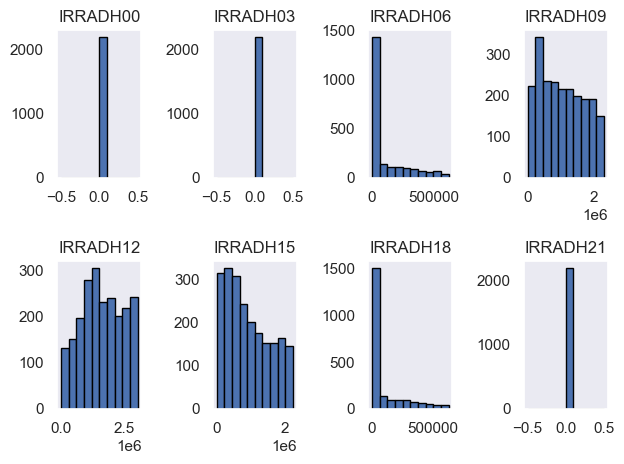

In [11]:
# Histograms:
df_orig_irrad[['IRRADH00', 'IRRADH03', 'IRRADH06', 'IRRADH09', 
               'IRRADH12', 'IRRADH15', 'IRRADH18', 'IRRADH21']].hist(layout=(2, 4), grid=False, edgecolor='black')
plt.tight_layout()
plt.show()

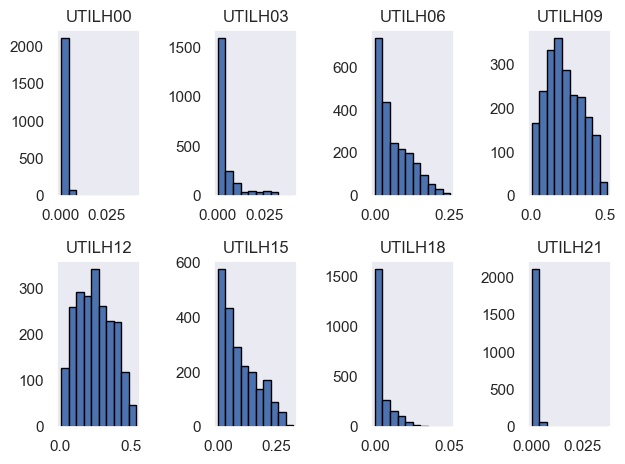

In [12]:
# Histograms:
df_orig_util[['UTILH00', 'UTILH03', 'UTILH06', 'UTILH09', 
              'UTILH12', 'UTILH15', 'UTILH18', 'UTILH21']].hist(layout=(2, 4), grid=False, edgecolor='black')
plt.tight_layout()
plt.show()

c:\Users\belus\anaconda3\envs\MLII\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


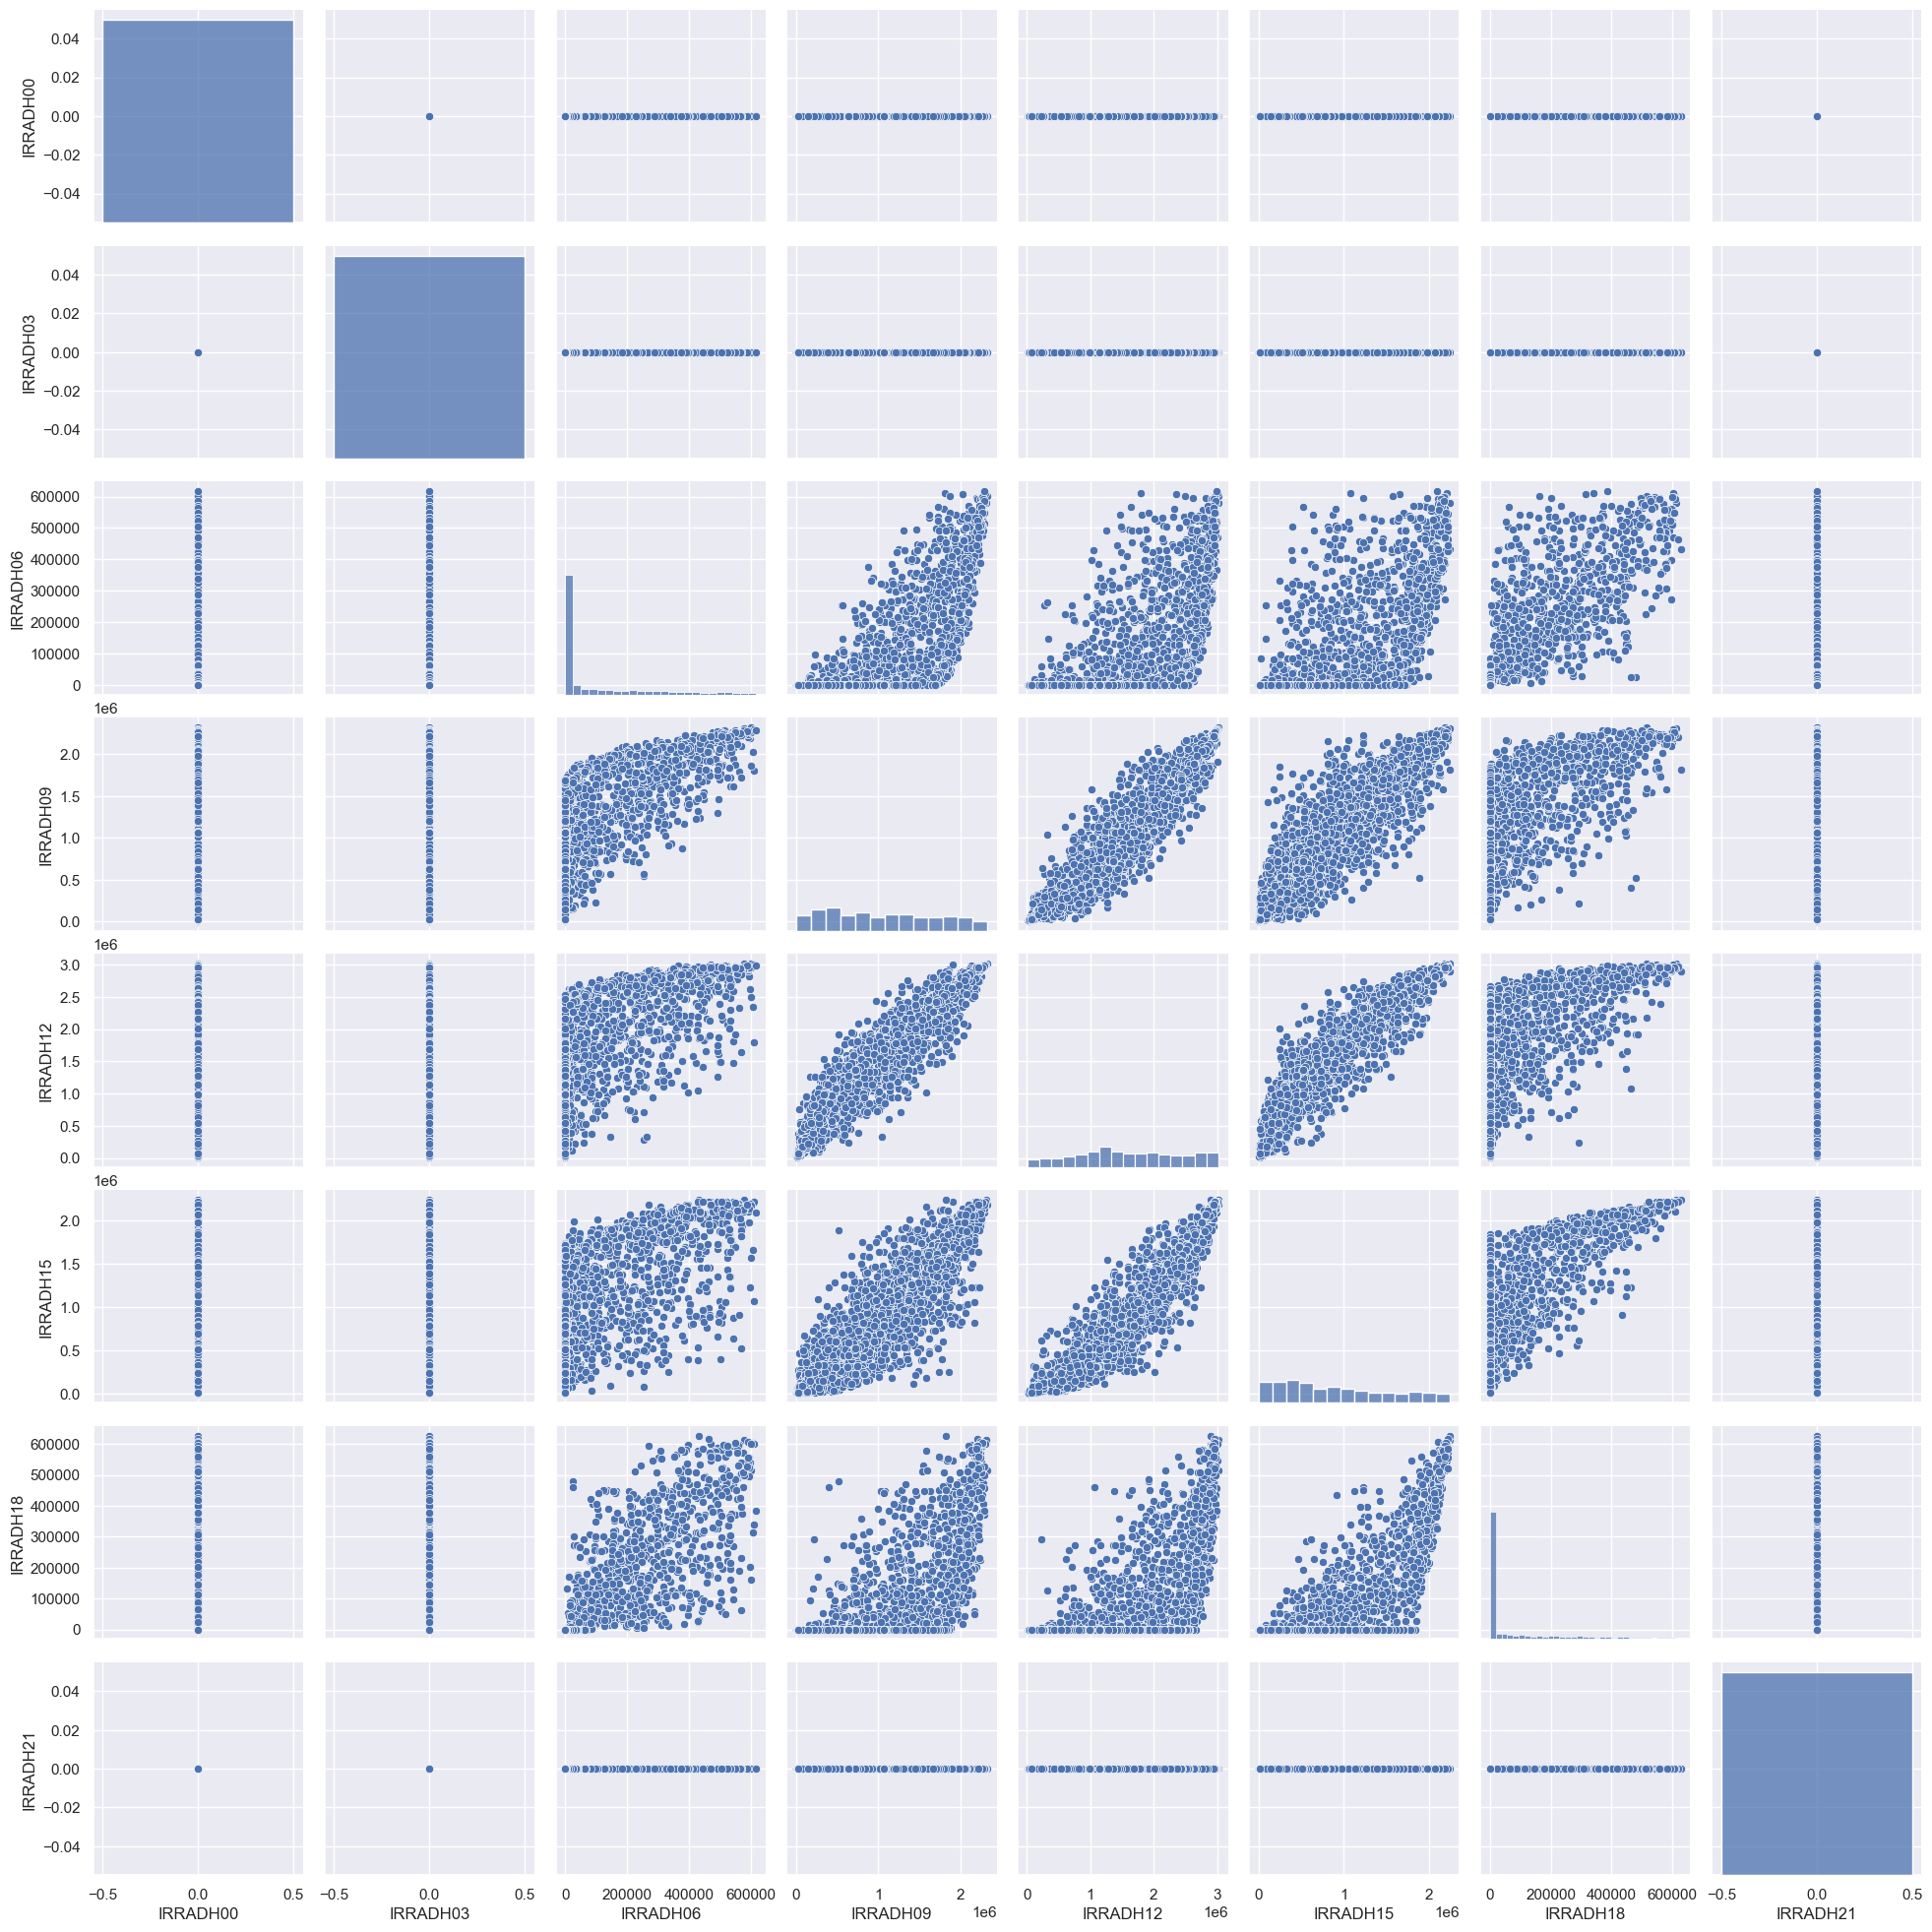

In [13]:
# Pairplot:
# Add pairplot between inputs and outputs?
sns.pairplot(df_orig_irrad, 
             vars=df_orig_irrad[['IRRADH00', 'IRRADH03', 'IRRADH06', 'IRRADH09', 
                                 'IRRADH12', 'IRRADH15', 'IRRADH18', 'IRRADH21']].columns.values.tolist())
plt.show()

c:\Users\belus\anaconda3\envs\MLII\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


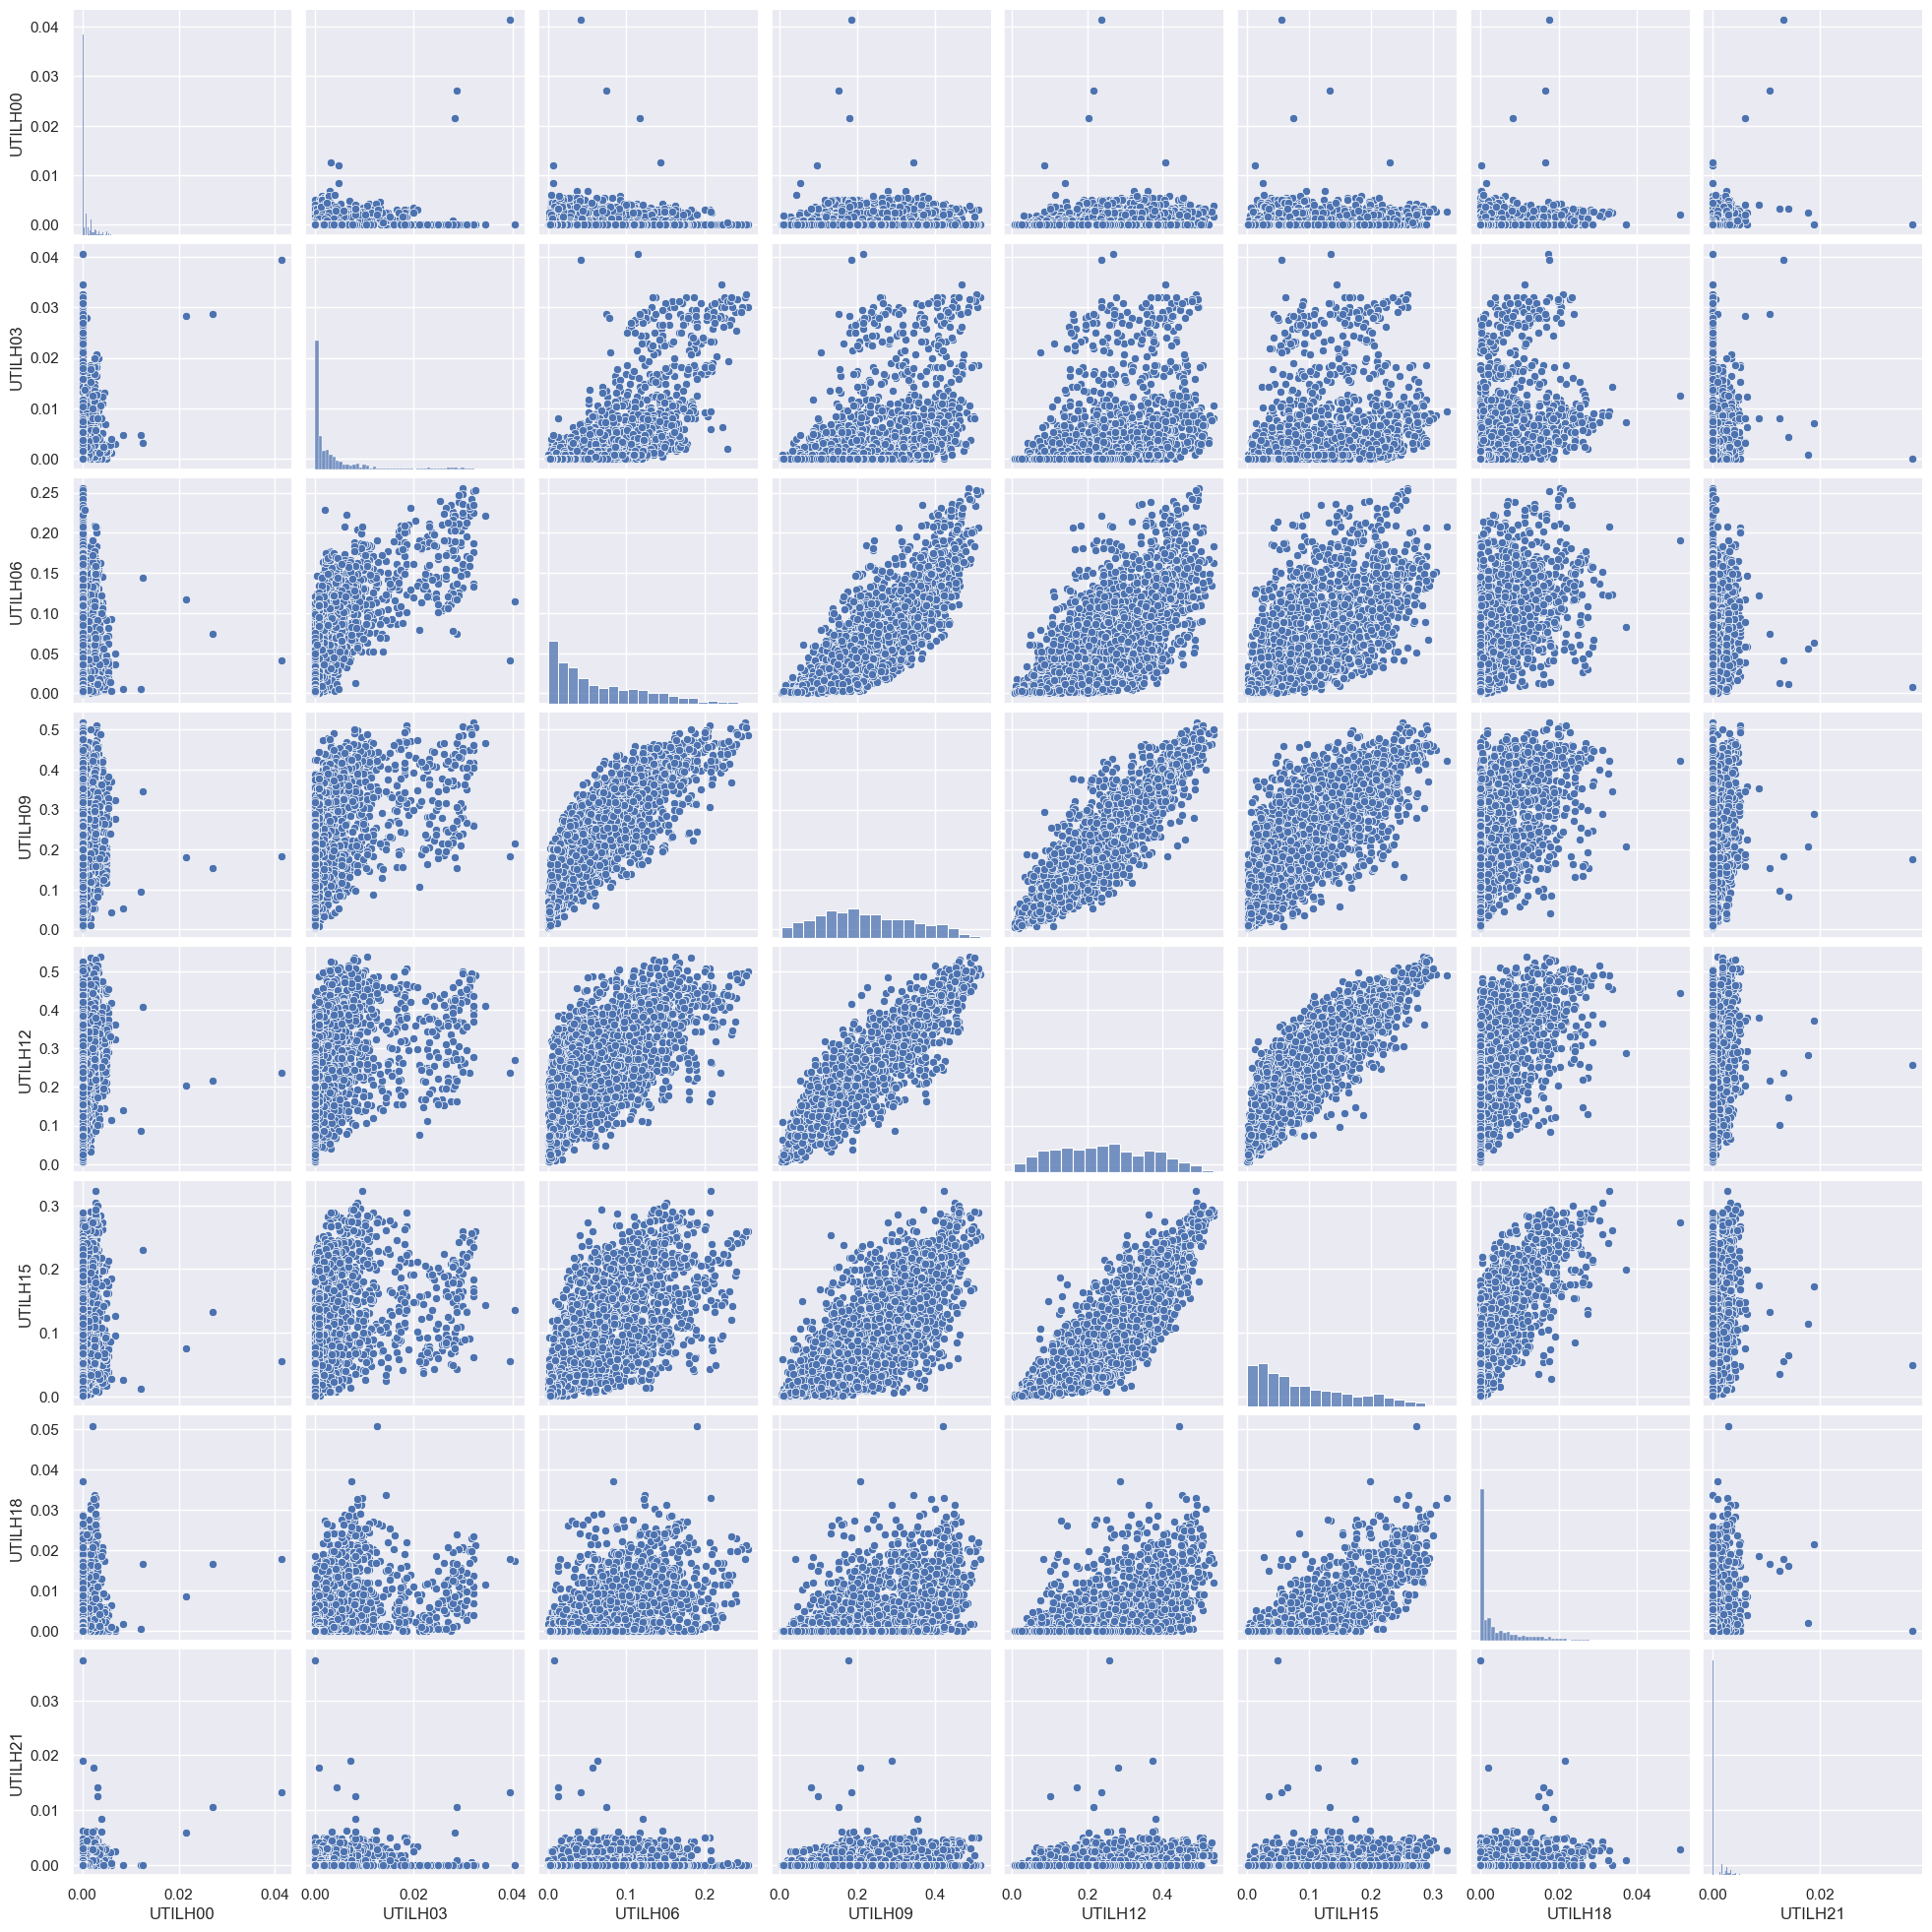

In [14]:
# Pairplot:
sns.pairplot(df_orig_util, 
             vars=df_orig_util[['UTILH00', 'UTILH03', 'UTILH06', 'UTILH09', 
                                'UTILH12', 'UTILH15', 'UTILH18', 'UTILH21']].columns.values.tolist())
plt.show()

c:\Users\belus\anaconda3\envs\MLII\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


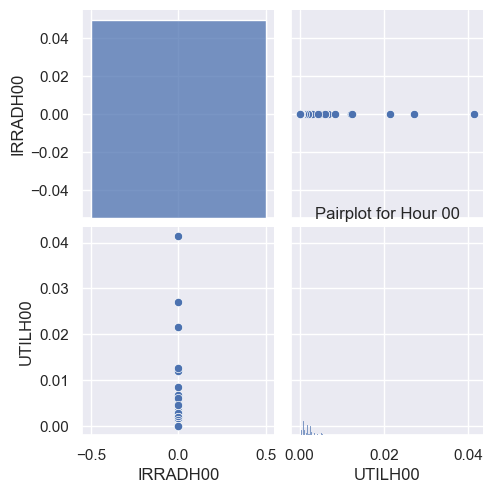

c:\Users\belus\anaconda3\envs\MLII\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


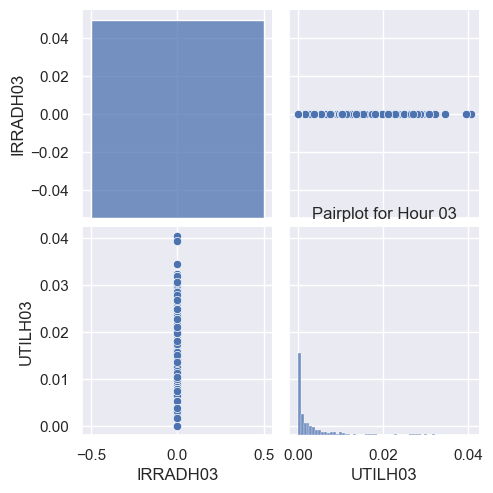

c:\Users\belus\anaconda3\envs\MLII\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


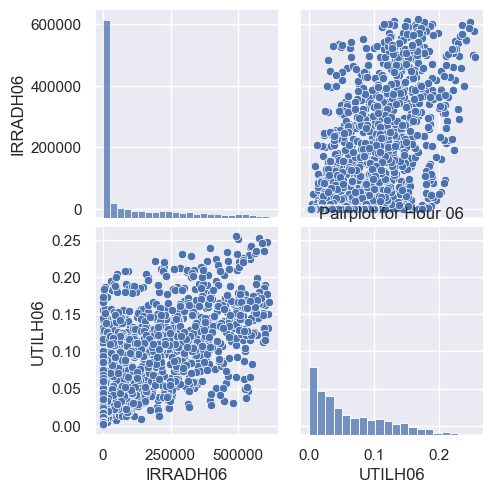

c:\Users\belus\anaconda3\envs\MLII\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


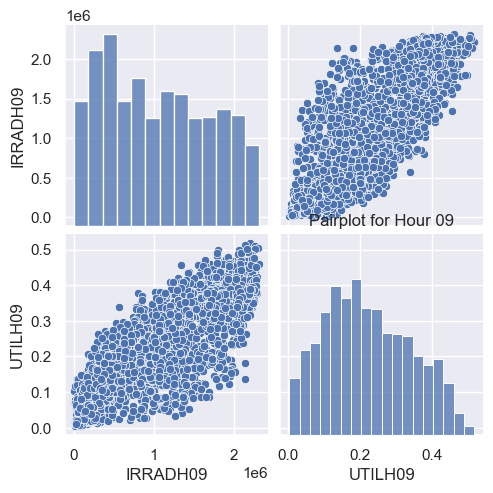

c:\Users\belus\anaconda3\envs\MLII\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


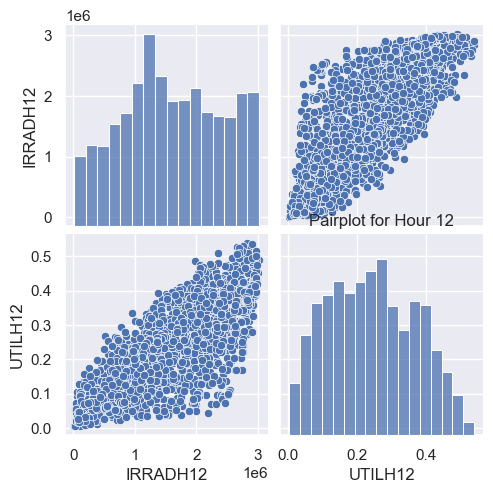

c:\Users\belus\anaconda3\envs\MLII\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


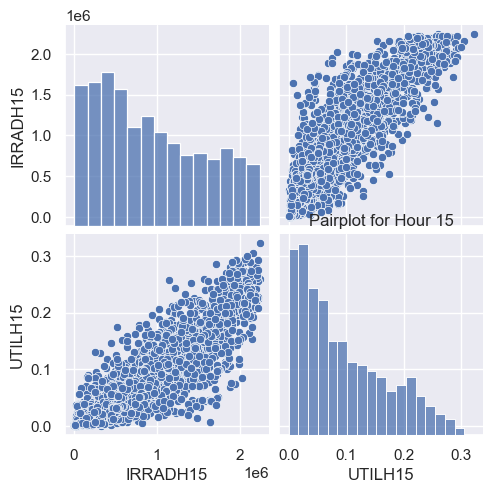

c:\Users\belus\anaconda3\envs\MLII\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


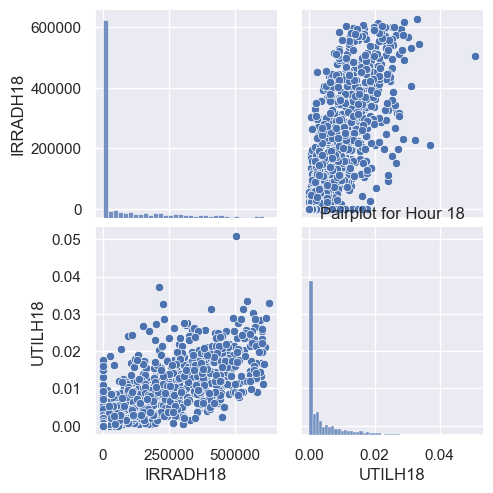

c:\Users\belus\anaconda3\envs\MLII\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


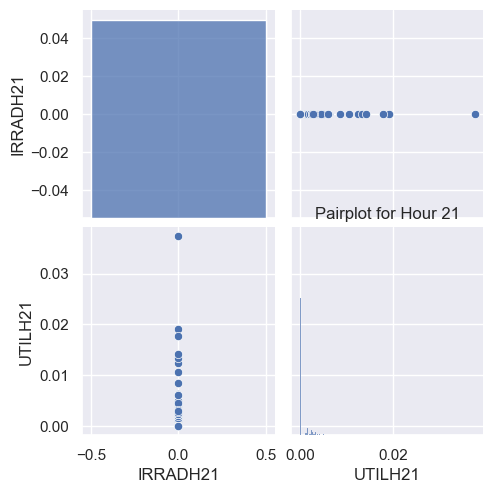

In [15]:
# Pairplot between inputs and outputs:
hours = ['00', '03', '06', '09', '12', '15', '18', '21']

for hour in hours:
    sns.pairplot(df, vars=['IRRADH' + hour, 'UTILH' + hour])
    plt.title('Pairplot for Hour ' + hour)
    plt.show()

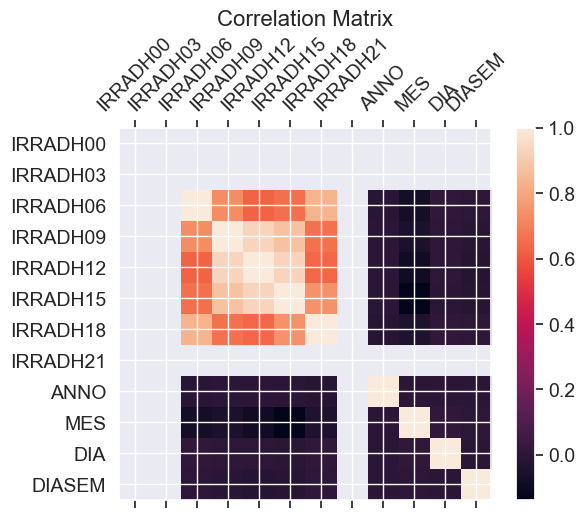

In [16]:
# Correlation between numeric variables
f = plt.figure()
plt.matshow(df_orig_irrad.select_dtypes(include=['int64','float64']).corr(), fignum=f.number)
plt.xticks(range(df_orig_irrad.select_dtypes(include=['int64','float64']).shape[1]), df_orig_irrad.select_dtypes(include=['int64','float64']).columns, fontsize=14, rotation=45)
plt.yticks(range(df_orig_irrad.select_dtypes(include=['int64','float64']).shape[1]), df_orig_irrad.select_dtypes(include=['int64','float64']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)
plt.show()

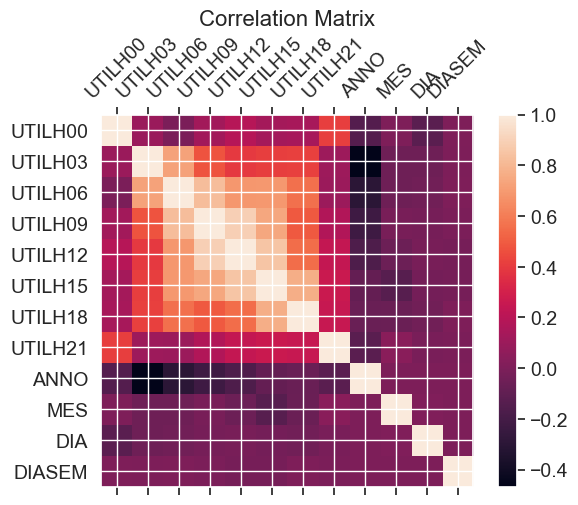

In [17]:
# Correlation between numeric variables
f = plt.figure()
plt.matshow(df_orig_util.select_dtypes(include=['int64','float64']).corr(), fignum=f.number)
plt.xticks(range(df_orig_util.select_dtypes(include=['int64','float64']).shape[1]), df_orig_util.select_dtypes(include=['int64','float64']).columns, fontsize=14, rotation=45)
plt.yticks(range(df_orig_util.select_dtypes(include=['int64','float64']).shape[1]), df_orig_util.select_dtypes(include=['int64','float64']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)
plt.show()